# Importing CSV files

In [1]:
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# https://data.austintexas.gov/Public-Safety/EMS-Spring-Festival-Season-2018-Incident-Details/q99r-2je5
# https://data.austintexas.gov/resource/ddqt-6p93.json
# SXSW 2018 was 3/9 - 3/18
ems = pd.read_csv('./ems.csv')

In [3]:
ems.head()

,Incident Key,Event Date,Event Day of Week,Incident Time,Location Longitude,Location Latitude,Responding Units,Dispositions,Transport Priorities,Patient Transports,Patient Refusals,Other Patient Outcomes,Total Patients,Patients Transported to CCP,Patients Transported From CPP,Incident Location,Current
0,1,03/13/2018,Tuesday,03/13/2018 03:00:00 PM,-97.739335,30.267068,SRU3,No Patient,NaN,0,0,0,0,0,0,"(30.267068, -97.739335)",NaN
1,2,03/13/2018,Tuesday,03/13/2018 04:00:00 PM,-97.738247,30.266782,"CCP1, SRU1, SRU3",Refusal,NaN,0,0,0,0,1,0,"(30.266782, -97.738247)",NaN
2,3,03/13/2018,Tuesday,03/13/2018 04:00:00 PM,-97.739335,30.267068,"CCP2, MTRC5, SRU5",Refusal,NaN,0,2,0,2,1,0,"(30.267068, -97.739335)",NaN
3,4,03/13/2018,Tuesday,03/13/2018 04:00:00 PM,-97.738025,30.267401,"CHP02, MCOT01, SRU3",No Patient,NaN,0,0,0,0,0,0,"(30.267401, -97.738025)",NaN
4,7,03/13/2018,Tuesday,03/13/2018 05:00:00 PM,-97.739313,30.267062,SRU1,Refusal,NaN,0,0,0,0,0,0,"(30.267062, -97.739313)",NaN


Changing to a datetime object

In [57]:
ems['datetime'] = pd.to_datetime(ems['Incident Time'])

In [58]:
ems['datetime'].head()

0   2018-03-13 15:00:00
1   2018-03-13 16:00:00
2   2018-03-13 16:00:00
3   2018-03-13 16:00:00
4   2018-03-13 17:00:00
Name: datetime, dtype: datetime64[ns]

Extract the day of the week from the date using `.dt.dayofweek`

In [9]:
ems['Event Date'].dt.dayofweek.head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
Name: Event Date, dtype: int64

Converting those dow numbers into string values with dictionaries and `.apply()`

In [12]:
week_lookup = {
    0 : 'Mon',
    1 : 'Tue',
    2 : 'Wed',
    3 : 'Thurs',
    4 : 'Fri',
    5 : 'Sat',
    6 : 'Sun'
}

In [25]:
# mon = 0, sun = 6
ems.groupby(ems['Event Date'].dt.dayofweek.apply(lambda x: week_lookup[x]), sort=False).size()

Event Date
Tue      14
Wed      15
Fri      45
Thurs    19
Sat      48
dtype: int64

In [42]:
ebd = ems.groupby(ems['Event Date'].dt.dayofweek, sort=True).size()
ebd

Event Date
1    14
2    15
3    19
4    45
5    48
dtype: int64

Plotting within a notebook

In [43]:
ebd.index.tolist()

[1, 2, 3, 4, 5]

In [47]:
[week_lookup[x] for x in ebd.index.tolist()]

['Tue', 'Wed', 'Thurs', 'Fri', 'Sat']

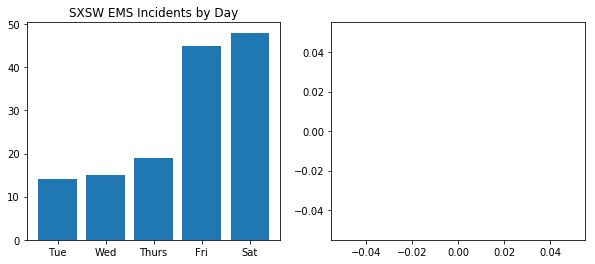

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(10)

for i, ax in enumerate(axes):
    # graph on the left
    if i == 0:
        ax.set_title('SXSW EMS Incidents by Day')
        ax.bar(ebd.index.tolist(), ebd.values.tolist())
        ax.set_xticklabels(['foo'] + [week_lookup[x] for x in ebd.index.tolist()])
    # graph on the right:
    if i == 1:
        ax.bar
plt.plot();

In [55]:
pd.to_datetime(ems['Incident Time'])

0     2018-03-13 15:00:00
1     2018-03-13 16:00:00
2     2018-03-13 16:00:00
3     2018-03-13 16:00:00
4     2018-03-13 17:00:00
5     2018-03-13 18:00:00
6     2018-03-13 18:00:00
7     2018-03-13 19:00:00
8     2018-03-13 21:00:00
9     2018-03-14 00:00:00
10    2018-03-14 00:00:00
11    2018-03-14 00:00:00
12    2018-03-14 02:00:00
13    2018-03-14 02:00:00
14    2018-03-14 15:00:00
15    2018-03-14 16:00:00
16    2018-03-14 16:00:00
17    2018-03-14 17:00:00
18    2018-03-14 17:00:00
19    2018-03-14 20:00:00
20    2018-03-14 20:00:00
21    2018-03-14 20:00:00
22    2018-03-14 23:00:00
23    2018-03-14 23:00:00
24    2018-03-15 00:00:00
25    2018-03-15 00:00:00
26    2018-03-16 16:00:00
27    2018-03-15 00:00:00
28    2018-03-15 01:00:00
29    2018-03-15 02:00:00
              ...        
111   2018-03-17 20:00:00
112   2018-03-17 20:00:00
113   2018-03-17 20:00:00
114   2018-03-17 21:00:00
115   2018-03-17 21:00:00
116   2018-03-17 21:00:00
117   2018-03-17 22:00:00
118   2018-0

## Charting Stuff on a Map

In [35]:
ems['lat'] = ems['Incident Location'].apply(lambda x: float(re.findall(r'-?\d+.\d+', x)[0]))
ems['lon'] = ems['Incident Location'].apply(lambda x: float(re.findall(r'-?\d+.\d+', x)[1]))

In [37]:
ems.head(1)

,Incident Key,Event Date,Event Day of Week,Incident Time,Location Longitude,Location Latitude,Responding Units,Dispositions,Transport Priorities,Patient Transports,Patient Refusals,Other Patient Outcomes,Total Patients,Patients Transported to CCP,Patients Transported From CPP,Incident Location,Current,lat,lon
0,1,2018-03-13,Tuesday,03/13/2018 03:00:00 PM,-97.739335,30.267068,SRU3,No Patient,NaN,0,0,0,0,0,0,"(30.267068, -97.739335)",NaN,30.267068,-97.739335


In [38]:
with open("./constants.json") as f:
    data = f.read()
    api_key = json.loads(data)['key']

gmaps.configure(api_key=api_key)
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(ems[['lat', 'lon']], weights=ems['Total Patients']))

In [39]:
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
import pandas as pd
import os
import xlrd

# avoids WARNING *** file size (499584) not 512 + multiple of sector size (512) error
wb = xlrd.open_workbook('./product.xls', logfile=open(os.devnull, 'w'))
s0 = pd.read_excel(wb, engine='xlrd', sheet_name=0)